# Assignment 2

## Mark Haskins

### import libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import Image
import graphviz
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestCentroid

### Problem 1a

In [104]:
terms = pd.read_csv("modifiedterms.txt", sep=" ", header=None )
terms

,0
0,david
1,rex
2,wood
3,subject
4,call
...,...
5495,shear
5496,handi
5497,inexperienc
5498,markw


In [105]:
testClass = pd.read_csv("testClasses.txt", sep="\t", header=None)
testClass

,0,1
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
195,195,1
196,196,1
197,197,0
198,198,1


In [106]:
trainClass = pd.read_csv("trainClasses.txt", sep="\t", header=None)
trainClass

,0,1
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
795,795,0
796,796,1
797,797,1
798,798,1


In [107]:
testMatrix = pd.read_csv("testMatrixModified.txt", sep="\t", header=None)
testMatrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
trainMatrix = pd.read_csv("trainMatrixModified.txt", sep="\t", header=None)
trainMatrix

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Top 20 words Decreasing Order

In [109]:
trainMatrixT = trainMatrix.T
termFreq = trainMatrixT.sum(axis=1)
termFreqSort = termFreq.sort_values(axis=0, ascending=False, inplace=False)
termFreqSort.head(20)

640    4367.0
686    3740.0
39     3468.0
779    2754.0
425    2715.0
499    1702.0
170    1477.0
556    1465.0
405    1464.0
576    1051.0
497     792.0
216     778.0
206     770.0
146     705.0
49      665.0
202     536.0
459     520.0
636     513.0
29      485.0
768     447.0
dtype: float64

#### Plot Distribution

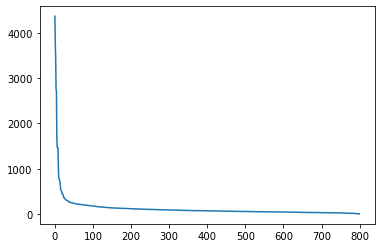

In [110]:
plt.plot(sorted(termFreq, reverse=True))
plt.show()

### Problem 1b

In [111]:
#convert to array
trainMatrixTA = np.array(trainMatrixT)
#transpost test matrix
testMatrixT = testMatrix.T
testMatrixTA = np.array(testMatrixT)
trainClassA = np.array(trainClass)

#### Create knn_search function to be used in classifier function

In [112]:
def knn_search(x, D, K, measure):
    if measure == 0:
        #Euclidean
        dists = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        #Cosine
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - sims
    idx = np.argsort(dists)
    return idx[:K], dists

#### Testing Search function to be used in the classifier function

In [113]:
#testMatrixTA[0] is the first row or instance of the test data, 5 is the nearest neighbors, 0 = Euclidean
neigh_idx, distances = knn_search(testMatrixTA[0], trainMatrixTA, 5, 0)
print("\nNeighbor Index:")
print(neigh_idx)


Neighbor Index:
[685 628 703 266 510]


In [114]:
print("\nNeighbors:")
trainMatrixT.iloc[neigh_idx]


Neighbors:


,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
#testMatrixTA[0] is the second row or instance of the test data, 5 is the nearest neighbors, 1 = Cosine
neigh_idx, distances = knn_search(testMatrixTA[0], trainMatrixTA, 5, 1)
print("\nNeighbor Index:")
print(neigh_idx)


Neighbor Index:
[685 628 667 152 427]


In [116]:
print("\nNeighbors:")
trainMatrixT.iloc[neigh_idx]


Neighbors:


,0,1,2,3,4,5,6,7,8,9,...,5490,5491,5492,5493,5494,5495,5496,5497,5498,5499
685,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Classifier function calling search function

In [125]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    predicted_label = count.most_common(1)[0][0]
    return count.most_common(), K, neigh_idx, predicted_label

In [126]:
#converting test and training labels to series and then to arrays 
trainClassSeries = trainClass[1].squeeze()
trainClassSeriesA = np.array(trainClassSeries)
testClassSeries = testClass[1].squeeze()
testClassSeriesA = np.array(testClassSeries)
trainMatrixTA.shape

(800, 5500)

In [127]:
testMatrixTA.shape

(200, 5500)

#### Testing Classifier Function with both euclidean and cosine measures

In [128]:
#Euclidean
for i in range(2):
    count, K, neigh_idx, predicted_label = knn_classify(testMatrixTA[i,:], trainMatrixTA, 5, trainClassSeriesA, 0)
    print("Indices of K Nearest Neighbors:",neigh_idx )
    print("Labels for top", K, "neighbors: ", count)
    print("Predicted Label: ", predicted_label, "==> Actual Label: ", testClassSeriesA[i])
    print()

Indices of K Nearest Neighbors: [685 628 703 266 510]
Labels for top 5 neighbors:  [(1, 5)]
Predicted Label:  1 ==> Actual Label:  1

Indices of K Nearest Neighbors: [798 554 757 224  38]
Labels for top 5 neighbors:  [(0, 3), (1, 2)]
Predicted Label:  0 ==> Actual Label:  0



In [129]:
#Cosine
for i in range(2):
    count, K, neigh_idx, predicted_label = knn_classify(testMatrixTA[i,:], trainMatrixTA, 5, trainClassSeriesA, 1)
    print("Indices of K Nearest Neighbors:",neigh_idx) 
    print("Labels for top", K, "neighbors: ", count)
    print("Predicted Label: ", predicted_label, "==> Actual Label: ", testClassSeriesA[i])
    print()

Indices of K Nearest Neighbors: [685 628 667 152 427]
Labels for top 5 neighbors:  [(1, 5)]
Predicted Label:  1 ==> Actual Label:  1

Indices of K Nearest Neighbors: [382 775 163 587 550]
Labels for top 5 neighbors:  [(0, 5)]
Predicted Label:  0 ==> Actual Label:  0



### Problem 1c

#### Evaluation function

In [130]:
def knn_evaluate (test, test_labs, train, train_labs, K, measure):
    T = 0
    F = 0
    for i in range(len(test)):
        actual=test_labs[i]
        count, K, top_K_neighbors, predicted = knn_classify(test[i], train, K, train_labs, measure)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    accuracy = float(T)/float(T+F) 
    return accuracy

In [131]:
accuracy = knn_evaluate(testMatrixTA, testClassSeriesA, trainMatrixTA, trainClassSeriesA, 5, 0)
print("Classification Accuracy: ", accuracy)

Classification Accuracy:  0.815


### Problem 1d 

#### Creating Euclid accuracy list based on different values of K

In [132]:
Euclid=[]
for K in range(5, 105, 5):
    Euclid.append(knn_evaluate(testMatrixTA, testClassSeriesA, trainMatrixTA, trainClassSeriesA, K, 0))
print(Euclid)

[0.815, 0.85, 0.785, 0.765, 0.73, 0.725, 0.69, 0.7, 0.655, 0.67, 0.655, 0.66, 0.625, 0.625, 0.63, 0.615, 0.615, 0.61, 0.605, 0.605]


#### Creating Cosine accuracy list based on different values of K

In [133]:
Cosine=[]
for K in range(5, 105, 5):
    Cosine.append(knn_evaluate(testMatrixTA, testClassSeriesA, trainMatrixTA, trainClassSeriesA, K, 1))
print(Cosine)

[0.97, 0.985, 0.985, 0.975, 0.97, 0.98, 0.98, 0.98, 0.975, 0.98, 0.975, 0.98, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


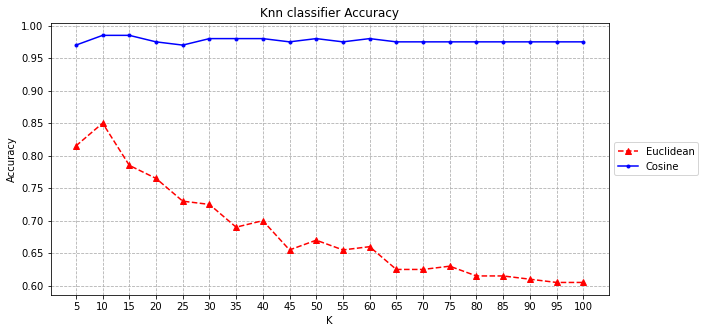

In [134]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, Euclid, 'r^--', label='Euclidean')
plt.plot(Ks, Cosine, 'b.-', label='Cosine')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Problem 1e

In [135]:
numTerms=trainMatrix.shape[0]
NDocs = trainMatrix.shape[1]
TD = trainMatrix
print(NDocs)
print(numTerms)

800
5500


#### Convert Training Matrix and Test Matrix to TFxIDF weights

In [136]:
DF = pd.DataFrame([(TD!=0).sum(1)]).T
NMatrix = np.ones(np.shape(TD), dtype = float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


####  IDF values

In [137]:
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
IDF

array([[4.  , 4.  , 4.  , ..., 4.  , 4.  , 4.  ],
       [6.84, 6.84, 6.84, ..., 6.84, 6.84, 6.84],
       [6.32, 6.32, 6.32, ..., 6.32, 6.32, 6.32],
       ...,
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64],
       [8.64, 8.64, 8.64, ..., 8.64, 8.64, 8.64]])

#### Training Matrix IDF weights - values are all the same columns of array

In [138]:
TD_tfidf = TD * IDF
pd.set_option("display.precision",2)
TD_tfidf

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,8.00,0.00,0.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,13.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,12.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,23.11,2.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.78,0.0,0.0,0.0,0.0,0.0,0.0,2.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5496,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5497,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
5498,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


#### Since IDF is a funciton of the term then all columns will be the same, take only first 200 columns


In [139]:
IDFt = IDF[:,:200]

#### Test Matrix IDF weights

In [140]:
testMatrix_tfidf = testMatrix * IDFt
testMatrix_tfidf

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Transpose and convert matrices to numpy array to supply for knn_evaluate arguments

In [141]:
TD_tfidf_TA = np.array(TD_tfidf.T)
TD_tfidf_TA.shape

(800, 5500)

In [142]:
testMatrix_tfidTA = np.array(testMatrix_tfidf.T)
testMatrix_tfidTA.shape

(200, 5500)

#### Rerun knn evaluation using cosine

In [143]:
CosineIDF=[]
for K in range(5, 105, 5):
    CosineIDF.append(knn_evaluate(testMatrix_tfidTA, testClassSeriesA, TD_tfidf_TA, trainClassSeriesA, K, 1))
print(Cosine)

[0.97, 0.985, 0.985, 0.975, 0.97, 0.98, 0.98, 0.98, 0.975, 0.98, 0.975, 0.98, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.975]


#### Line Chart comparing KNN classifier accuracy with cosine mesaure using IDF and non-IDF

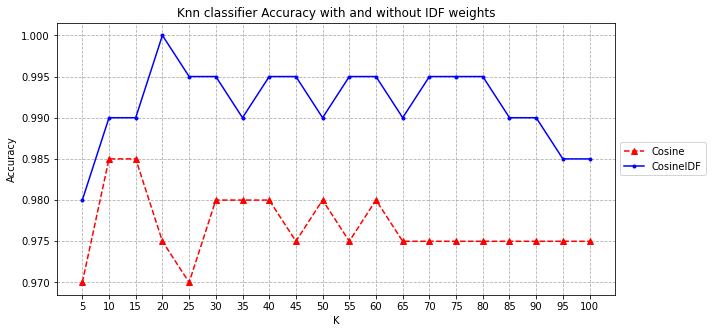

In [144]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, Cosine, 'r^--', label='Cosine')
plt.plot(Ks, CosineIDF, 'b.-', label='CosineIDF')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy with and without IDF weights')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Problem 1f
#### I wasn't able to figure out how to implement the algorithmn for this problem.

In [145]:
def Rocchio_Train(train, labels):
    prototype = {}
    #for i in labels:
    return prototype

In [146]:
def Rocchio_Classifier(protoype, instance):
    return predicted_label, sims

In [147]:
def Rocchio_evaluate(test, test_lab, protoype):
    return accuracy

### Problem 1g

#### Using scikit-learn's Nearest Centroid classifier to perform classification on the test instance

In [148]:
clf = NearestCentroid()
clf.fit(trainMatrixTA,trainClassSeriesA)
clf.predict(testMatrixTA)
print(clf.score(testMatrixTA,testClassSeriesA))

0.94


### Problem 2a

#### Load data into Pandas dataframe

In [149]:
adult  =pd.read_csv("adult-modified.csv")
adult

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9407,38,Private,10,Married,White,Male,60,>50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


#### Separate out income attribute to create target labels for classification

In [150]:
adult_labels = adult.income
adult_labels

0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
        ...  
9407     >50K
9408    <=50K
9409    <=50K
9410    <=50K
9411    <=50K
Name: income, Length: 9412, dtype: object

#### Create dummy variables for the categorical attributes so that the data set is fully numeric and drop income from the the datafame

In [151]:
adult_ssf = pd.get_dummies(adult, columns=['workclass','marital-status', 'race', 'sex'])
adult_ssf1 = adult_ssf.drop('income', axis = 1)

In [152]:
adult_ssf1

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1


#### Split the transformed data into training and test sets (using 80%-20% randomized split) using train_test_split function from the sklearn.model_selection module with random_state = 111

In [153]:
adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(adult_ssf1, adult_labels, test_size=0.2, random_state=111)
print(adult_train.shape)

(7529, 15)


In [154]:
print(adult_test.shape)

(1883, 15)


In [155]:
print(adult_target_train.shape)

(7529,)


In [156]:
print(adult_target_test.shape)

(1883,)


### Problem 2bi

#### Using preprocessing module of scikit-learn package normalize the data so all attributes are on the same scale between 0 and 1. Train scaler on the training portion of data only and then use scaler to transform training and test partitions 

In [157]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(adult_train)

MinMaxScaler()

In [158]:
adult_train_norm = min_max_scaler.fit_transform(adult_train)
adult_train_norm= pd.DataFrame(adult_train_norm, columns=adult_train.columns, index=adult_train.index)
adult_train_norm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
8487,0.18,0.60,0.40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2218,0.27,0.27,0.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7839,0.40,0.53,0.40,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1914,0.08,0.80,0.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7147,0.60,0.53,0.55,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [159]:
adult_test_norm = min_max_scaler.fit_transform(adult_test)
adult_test_norm = pd.DataFrame(adult_test_norm, columns=adult_test.columns, index=adult_test.index)
adult_test_norm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
1699,0.07,0.40,0.34,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.12,0.60,0.44,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2985,0.58,0.53,0.39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
699,0.21,0.60,0.39,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1090,0.29,0.80,0.60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Run KNN classifier using K = 10

In [160]:
n_neighbors = 10
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(adult_train_norm,adult_target_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [161]:
knnpreds_test = knnclf.predict(adult_test_norm)
print(classification_report(adult_target_test, knnpreds_test))

              precision    recall  f1-score   support

       <=50K       0.85      0.88      0.86      1417
        >50K       0.59      0.52      0.55       466

    accuracy                           0.79      1883
   macro avg       0.72      0.70      0.71      1883
weighted avg       0.78      0.79      0.79      1883



#### Confusion Matrix

In [162]:
knncm = confusion_matrix(adult_target_test, knnpreds_test)
print(knncm)

[[1248  169]
 [ 224  242]]


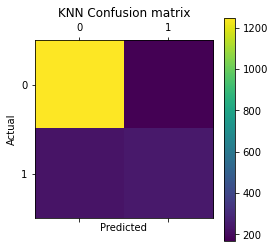

In [163]:
plt.matshow(knncm)
plt.title('KNN Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Model Accuracy for Test

In [164]:
print(knnclf.score(adult_test_norm, adult_target_test))

0.7912904938927243


#### Model Accuracy for Train

In [165]:
print(knnclf.score(adult_train_norm, adult_target_train))

0.9432859609509895


### Problem 2bii

#### Different values of K (5 to 100) with distance weight

In [166]:
distance = []
for K in range(5, 105, 5):
    knnclfD = neighbors.KNeighborsClassifier(K, weights='distance')
    knnclfD.fit(adult_train_norm,adult_target_train)
    distance.append(knnclfD.score(adult_test_norm, adult_target_test))
print(distance)

[0.7732342007434945, 0.7912904938927243, 0.7928836962294211, 0.7939458311205523, 0.7960701009028146, 0.8035050451407328, 0.8040361125862985, 0.804567180031864, 0.8050982474774296, 0.8050982474774296, 0.804567180031864, 0.8056293149229952, 0.804567180031864, 0.8050982474774296, 0.8050982474774296, 0.8050982474774296, 0.8050982474774296, 0.8077535847052576, 0.8082846521508231, 0.8082846521508231]


#### Different values of K (5 to 100) with uniform weight

In [167]:
uniform = []
for K in range(5, 105, 5):
    knnclfU = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclfU.fit(adult_train_norm,adult_target_train)
    uniform.append(knnclfU.score(adult_test_norm, adult_target_test))
print(uniform)

[0.7785448751991503, 0.7997875730217737, 0.8008497079129049, 0.8040361125862985, 0.8098778544875199, 0.8109399893786511, 0.8114710568242167, 0.807222517259692, 0.8109399893786511, 0.8098778544875199, 0.8120021242697822, 0.8056293149229952, 0.804567180031864, 0.8056293149229952, 0.8040361125862985, 0.8040361125862985, 0.8056293149229952, 0.8093467870419543, 0.8061603823685608, 0.8098778544875199]


#### Line Plot comparing distance to uniform weighting schemes across different values of K. 

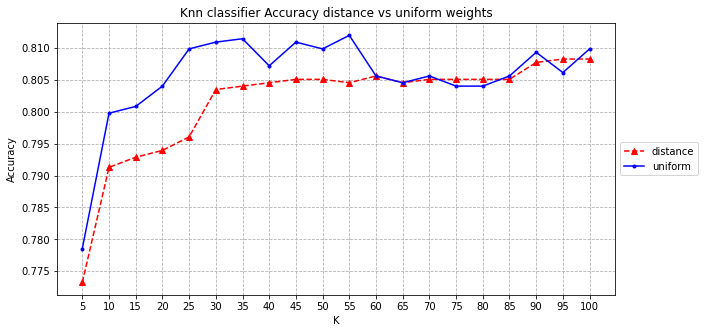

In [168]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, distance, 'r^--', label='distance')
plt.plot(Ks, uniform, 'b.-', label='uniform')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy distance vs uniform weights')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Plot indicated to use 55 and uniform weighting to generate for the best accuracy. Using this parameters to train new classifer

In [169]:
K = 55
knnclfB = neighbors.KNeighborsClassifier(K, weights='uniform')
knnclfB.fit(adult_train_norm,adult_target_train)

KNeighborsClassifier(n_neighbors=55)

#### Model Accuracy for Train

In [170]:
print(knnclfB.score(adult_train_norm, adult_target_train))

0.8173728250763713


#### Model Accuracy for Test

In [171]:
print(knnclfB.score(adult_test_norm, adult_target_test))

0.8120021242697822


### Problem 2biii

#### Uniform test accuracy was already computed across the K runs so reusing

In [172]:
uniformTest = uniform
print(uniformTest)

[0.7785448751991503, 0.7997875730217737, 0.8008497079129049, 0.8040361125862985, 0.8098778544875199, 0.8109399893786511, 0.8114710568242167, 0.807222517259692, 0.8109399893786511, 0.8098778544875199, 0.8120021242697822, 0.8056293149229952, 0.804567180031864, 0.8056293149229952, 0.8040361125862985, 0.8040361125862985, 0.8056293149229952, 0.8093467870419543, 0.8061603823685608, 0.8098778544875199]


#### Producing list of uniform target accruacy across K runs to leverage in plot

In [173]:
uniformTrain = []
for K in range(5, 105, 5):
    knnclfUT = neighbors.KNeighborsClassifier(K, weights='uniform')
    knnclfUT.fit(adult_train_norm,adult_target_train)
    uniformTrain.append(knnclfUT.score(adult_train_norm, adult_target_train))
print(uniformTrain)

[0.8537654402975162, 0.8426085801567273, 0.8370301500863329, 0.8315845397795192, 0.8254748306548014, 0.8237481737282507, 0.8248107318368973, 0.8221543365652809, 0.8177712843671139, 0.8196307610572453, 0.8173728250763713, 0.8189666622393412, 0.8165759064948864, 0.819099482002922, 0.8201620401115686, 0.8194979412936645, 0.8187010227121796, 0.8187010227121796, 0.8189666622393412, 0.8177712843671139]


#### Using uniform weights and differeing values of  K to create a line chart for test and training accuracy across multiple K runs.
#### I can see that overfitting is taking place when the value of K is very low (<25) because the Test and Training Data accuracy points are far off. However, as K increases (>25) I can see overfitting is no longer an issue as the Test and Training Data accuracy points come much closer together. 

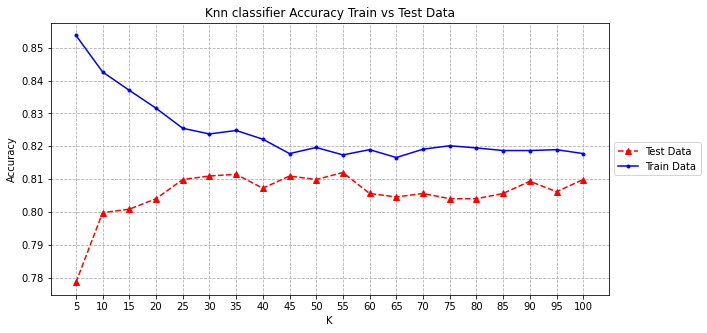

In [174]:
Ks=list(range(5, 105, 5))
plt.figure(figsize=(10,5))
plt.plot(Ks, uniformTest, 'r^--', label='Test Data')
plt.plot(Ks, uniformTrain, 'b.-', label='Train Data')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Knn classifier Accuracy Train vs Test Data')
plt.grid(linestyle='--')
plt.xticks(Ks)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Problem 2c

#### Using non-normalized training and test data, perform classification using scikit-learn's decision tree classifier with default parameters

In [175]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(adult_train, adult_target_train)
treepreds_test = treeclf.predict(adult_test)

#### Decision Tree Confusion Matrix 

In [176]:
treecm = confusion_matrix(adult_target_test, treepreds_test)
print(treecm)

[[1197  220]
 [ 257  209]]


#### Decision Tree Classification Report

In [177]:
print(classification_report(adult_target_test, treepreds_test))

              precision    recall  f1-score   support

       <=50K       0.82      0.84      0.83      1417
        >50K       0.49      0.45      0.47       466

    accuracy                           0.75      1883
   macro avg       0.66      0.65      0.65      1883
weighted avg       0.74      0.75      0.74      1883



#### Average Accuracy Score Test Data

In [178]:
print(treeclf.score(adult_test, adult_target_test))

0.7466808284652151


#### Average Accuracy Score Training Data

In [179]:
print(treeclf.score(adult_train, adult_target_train))

0.9432859609509895


#### The Training Score Accuracy is very high, but the Test Score Accuracy is much lower. This is suggesting that the model is overfitting. In terms of the the bias-variance trade-of, it's a high variance model that's overfitting the training data so the accuracy is worse on the new unseen test data as the model is not generalized enough to account for it. 

#### Decision Tree - Gini criterion, Min Sample Split = 10, Max Dept = 4 

In [180]:
treeclf2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=10, max_depth=4)
treeclf2 = treeclf2.fit(adult_train, adult_target_train)

#### Average Accuracy Score Test Data

In [181]:
print(treeclf2.score(adult_test, adult_target_test))

0.8130642591609134


#### Average Accuracy Score Training Data Gini


In [182]:
print(treeclf2.score(adult_train, adult_target_train))

0.817638464603533


#### Decision Tree Gini criterion visualization

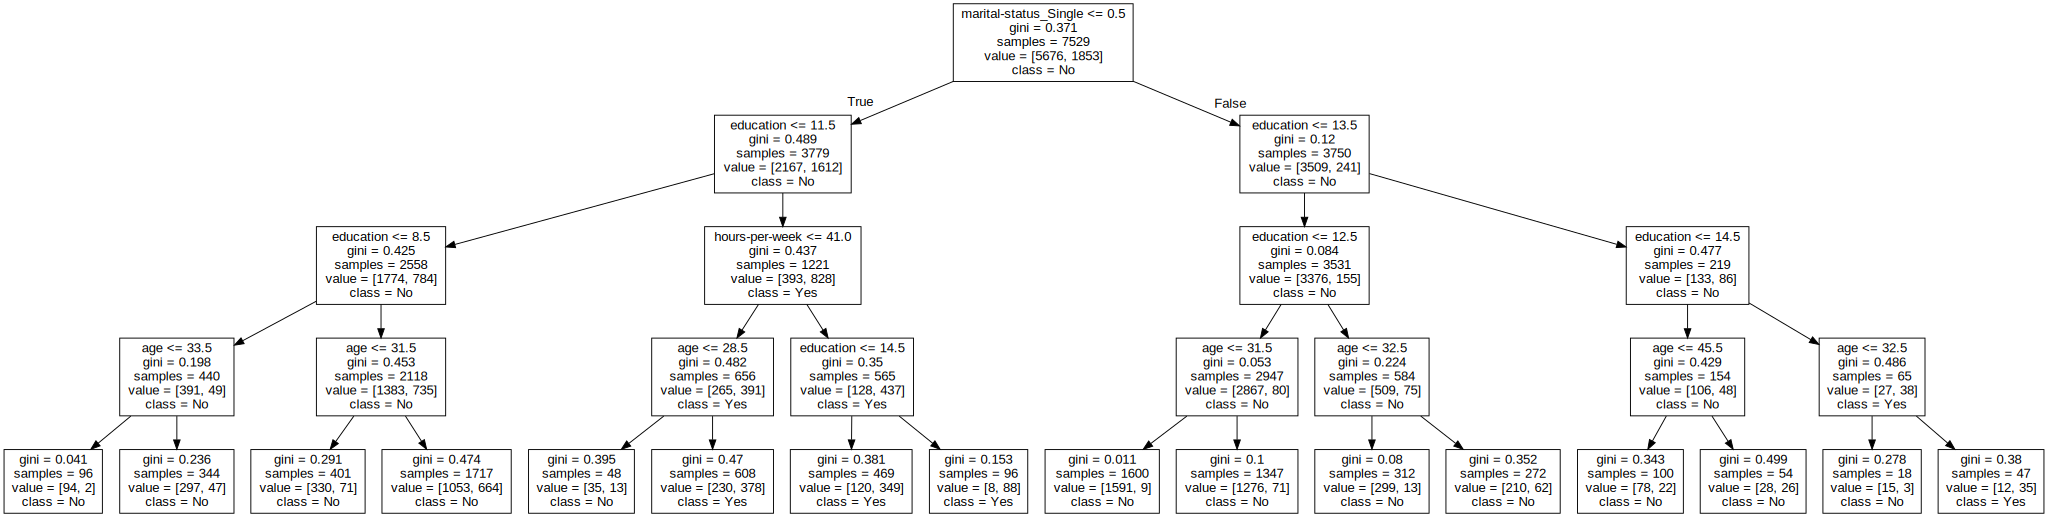

In [183]:
tree = export_graphviz(treeclf2, out_file=None, feature_names=adult_train.columns, class_names=['No','Yes'])
graph = Source(tree)
display(SVG(graph.pipe(format='svg')))

### Problem 2d

#### Naive Bayes (Gaussian) Classifier

In [184]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(adult_train, adult_target_train)
cv_scores_nb_train = cross_val_score(nbclf, adult_train, adult_target_train, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_nb_train.mean(), cv_scores_nb_train.std() * 2))

Overall Average Accuracy: 0.72 (+/- 0.03)


In [185]:
print("Accuracy on Training: ",  nbclf.score(adult_train, adult_target_train))

Accuracy on Training:  0.7218754150617612


#### The Cross Validation Accuracy on the Training and the Overall Average Accuracy are very close, this is a good sign that the model is not being underfit or overfit.

In [186]:
print("Accuracy on Test: ", nbclf.score(adult_test, adult_target_test))

Accuracy on Test:  0.7110993096123208


#### Linear Discriminant Analysis Classifier

In [187]:
ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(adult_train, adult_target_train)
cv_scores_ld_train = cross_val_score(ldclf, adult_train, adult_target_train, cv=10)
print("Overall Average Accuracy: %0.2f (+/- %0.2f)" % (cv_scores_ld_train.mean(), cv_scores_ld_train.std() * 2))

Overall Average Accuracy: 0.81 (+/- 0.02)


In [188]:
print("Accuracy on Training: ",  ldclf.score(adult_train, adult_target_train))

Accuracy on Training:  0.8115287554788152


#### The Cross Validation Accuracy on the Training and the Overall Average Accuracy are very close, this is a good sign that the model is not being underfit or overfit.

In [189]:
print("Accuracy on Test: ", ldclf.score(adult_test, adult_target_test))

Accuracy on Test:  0.7992565055762082
